In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


100%|██████████| 2.70G/2.70G [00:25<00:00, 113MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
# Importing necessary libraries ,as first we take dataset from kagglehub and copy that here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2  # if on local system  use pip install to import all libarary

In [3]:
train ='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [5]:
size =224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,   # Randomly rotates images up to 90 degrees
    width_shift_range=0.0,  # No horizontal shift
    height_shift_range=0.0,  # No vertical shift
    shear_range=0.0,   # No shearing transformation
    zoom_range=0.0,    # No zooming
    horizontal_flip=True,  # Randomly flips images horizontally
    vertical_flip=True,    # Randomly flips images vertically
    rescale=1./255,  # Normalizes pixel values (0 to 255 → 0 to 1)
    preprocessing_function=None,  # No additional custom preprocessing
    validation_split=0.1  # Splits 10% of the dataset for validation


).flow_from_directory(
    train,  # Path to training dataset directory
    target_size=(size, size),  # Resize images to 224x224 pixels
    batch_size=164,  # Load 164 images per batch
    class_mode='categorical',  # Multi-class classification (one-hot encoding)
    color_mode='rgb',  # Load images in RGB mode (3 color channels)
    subset='training',  # Use only training data (excludes validation set)
    shuffle=True  # Shuffle the data for better training
)


Found 63282 images belonging to 38 classes.


In [6]:

train_generator.class_indices #Python dictionary that maps each class name (folder name) to a numerical label. This mapping is automatically assigned when using flow_from_directory().

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

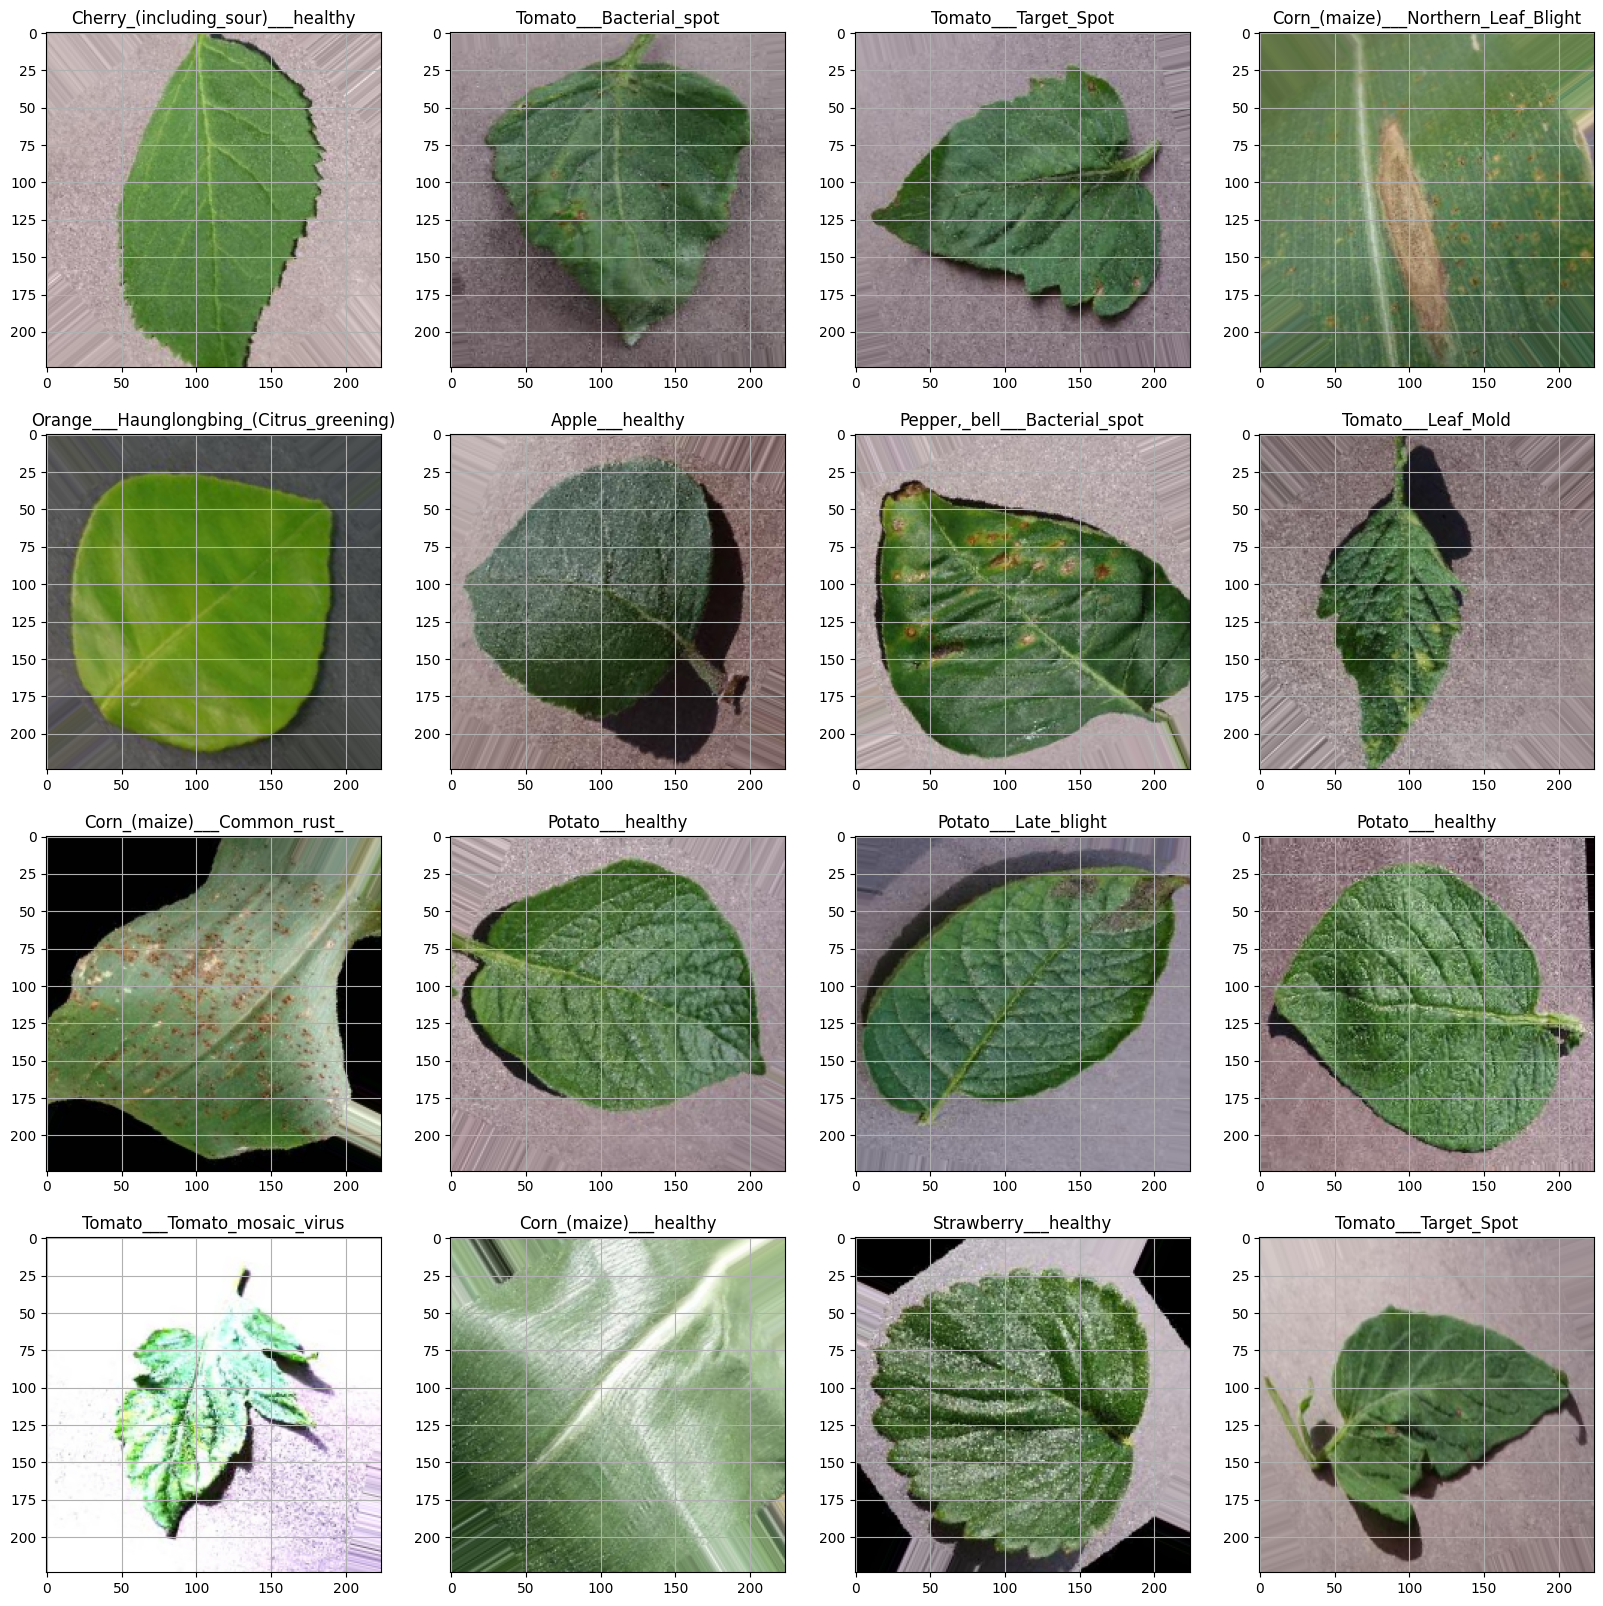

In [9]:
# Display some images
#(This code visualizes a batch of images from train_generator along with their corresponding class labels.)
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)  # Arrange images in a 4x4 grid
    plt.imshow(X_batch[i])  # Display the image
    plt.title(classes[np.where(y_batch[i] == 1)[0][0]])  # Find the class index and get the class name
    plt.grid(None)  # Remove grid lines
  plt.show()
  break

In [10]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
    # instant of above train replaice it by valid and all are same

In [11]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,  # Normalize pixel values (0-255 → 0-1)
    preprocessing_function=None,
    validation_split=0.1  # Use 10% of the dataset for validation
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size, size),  # Resize images to (224, 224)
    class_mode='categorical',  # Multi-class classification
    color_mode='rgb',  # Load images in RGB format
    subset='validation',  # Select the validation subset
    shuffle=False  # Do not shuffle (useful for evaluation)
)


Found 1742 images belonging to 38 classes.


In [13]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,  # Normalize pixel values (0-255 → 0-1)
    preprocessing_function=None
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224, 224),  # Resize images to (224, 224)
    color_mode='rgb',  # Load images in RGB format
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Keep order fixed for evaluation
)


Found 17572 images belonging to 38 classes.


In [14]:
test_generator.class_indices
#returns a dictionary mapping class names to integer labels.

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma